### Lab | Random variable distributions

In [2]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [8]:
data2 = data._get_numeric_data()
data2.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


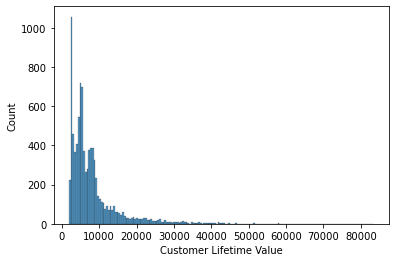

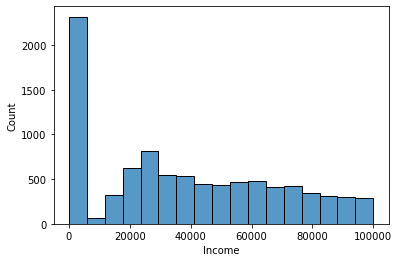

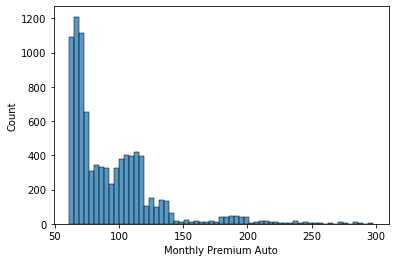

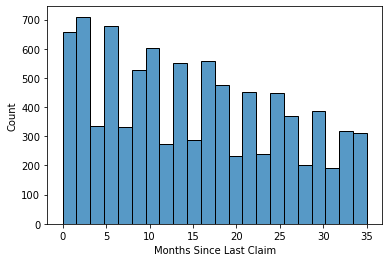

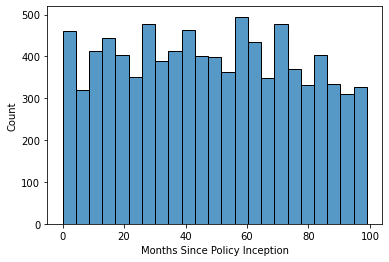

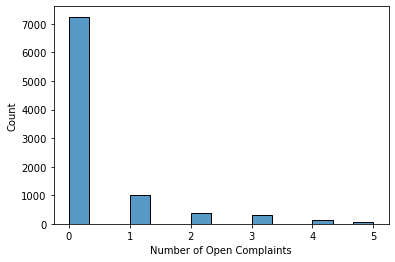

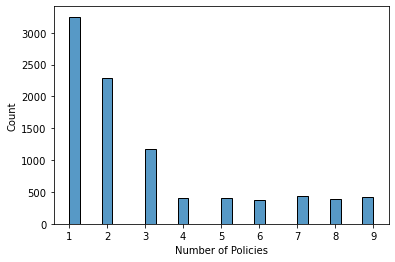

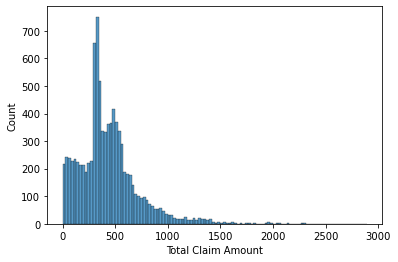

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

sns.histplot(x='Customer Lifetime Value', data = data2) # logarithmic
plt.show()
sns.histplot(x='Income', data = data2) #  log-normal but high amount of zeros
plt.show()
sns.histplot(x='Monthly Premium Auto', data = data2) # logarithmic
plt.show()
sns.histplot(x='Months Since Last Claim', data = data2) # uniform
plt.show()
sns.histplot(x='Months Since Policy Inception', data = data2) # uniform
plt.show()
sns.histplot(x='Number of Open Complaints', data = data2) # logarithmic
plt.show()
sns.histplot(x='Number of Policies', data = data2) # logarithmic
plt.show()
sns.histplot(x='Total Claim Amount', data = data2) # log-normal?
plt.show()

In [ ]:
# 'Customer Lifetime Value'  # exponential
# 'Income' #  log-normal but high amount of zeros
# 'Monthly Premium Auto' # exponential
# 'Months Since Last Claim'  # uniform
# 'Months Since Policy Inception' # uniform
# 'Number of Open Complaints' # exponential [but small amount of bins]
# 'Number of Policies'  # exponential [but small amount of bins]
# 'Total Claim Amount' # exponential

#### Customer Lifetime Value

skewness is: 3.031782271327885


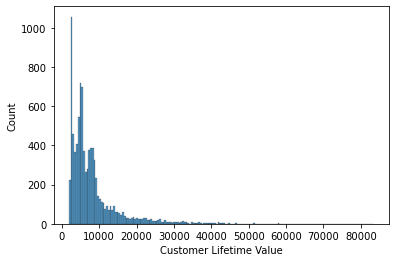

In [77]:
from scipy.stats import skew
print('skewness is:',skew(data2['Customer Lifetime Value']))
sns.histplot(x='Customer Lifetime Value', data = data2) 
plt.show()



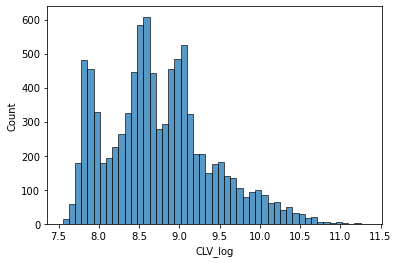

In [78]:
data2['CLV_log']=np.log(data2['Customer Lifetime Value'])
sns.histplot(x='CLV_log', data = data2) 
plt.show() # better

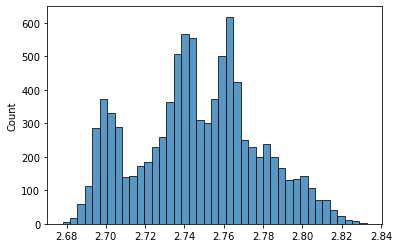

In [17]:
from scipy import stats
xt, labmda = stats.boxcox(data2['Customer Lifetime Value'])
sns.histplot(xt) 
plt.show() # at least it symmetric now

#### Income

skewness is: 0.2888474588492577


<AxesSubplot:xlabel='Income', ylabel='Count'>

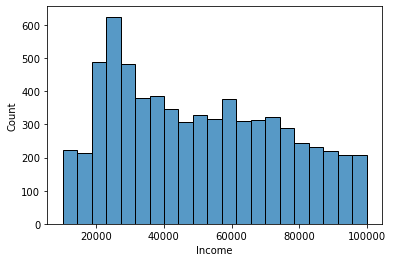

In [72]:
income = data2[data2['Income']>0]['Income']
print('skewness is:',skew(income))
# low skewness for box-cox and yeo-johnson
sns.histplot(income) 

<AxesSubplot:xlabel='Income', ylabel='Count'>

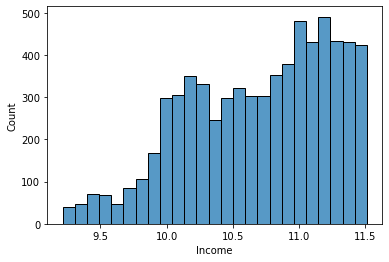

In [43]:
income3 = np.log(income)
sns.histplot(income3) # does not look normal

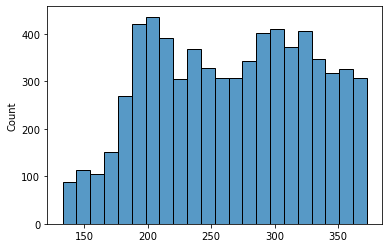

In [44]:
xt, labmda = stats.boxcox(income)
sns.histplot(xt) 
plt.show() # does not look normal

<AxesSubplot:ylabel='Count'>

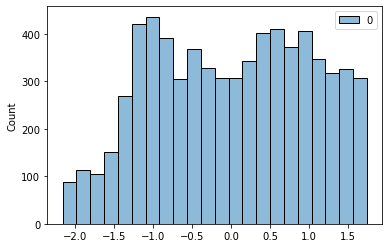

In [47]:
from sklearn.preprocessing import PowerTransformer
income2 = income.values.reshape(-1,1)
transformer = PowerTransformer(method='yeo-johnson')
transformer.fit(income2)
income2 = transformer.transform(income2)

sns.histplot(income2) # looks the same as for box-cox

<AxesSubplot:ylabel='Count'>

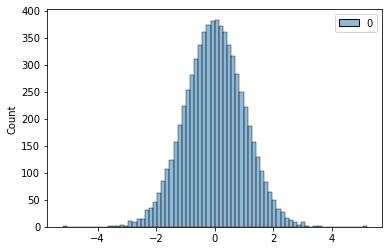

In [54]:
from sklearn.preprocessing import QuantileTransformer
income2 = income.values.reshape(-1,1)
transformer = QuantileTransformer(output_distribution = 'normal')
transformer.fit(income2)
income2 = transformer.transform(income2)

sns.histplot(income2) #too perfect to be true

#### Monthly Premium Auto

skewness is: 2.123197701864424


<AxesSubplot:xlabel='Monthly Premium Auto', ylabel='Count'>

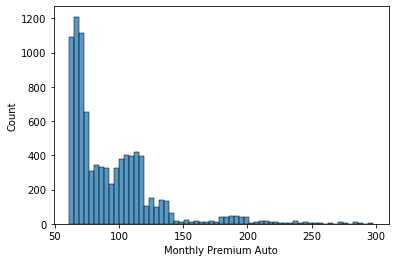

In [73]:
mpa = data2['Monthly Premium Auto']
print('skewness is:',skew(mpa))
sns.histplot(mpa) # skewnes just at the edge of to be repairable

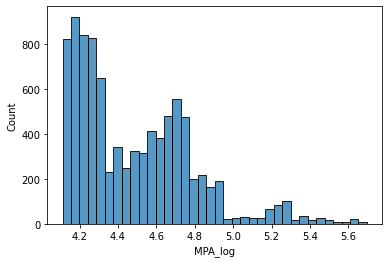

In [67]:
data2['MPA_log']=np.log(data2['Monthly Premium Auto'])
sns.histplot(x='MPA_log', data = data2) 
plt.show() #less outliers

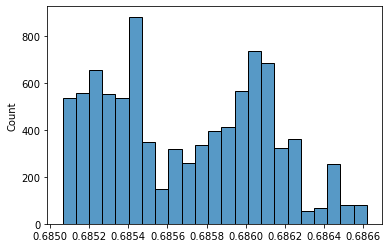

In [68]:
xt, labmda = stats.boxcox(mpa)
sns.histplot(xt) 
plt.show() #uhm

#### Total Claim Amount

skewness is: 1.7146841624611302


<AxesSubplot:xlabel='Total Claim Amount', ylabel='Count'>

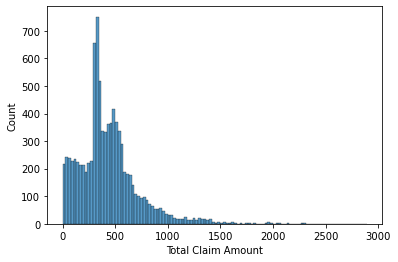

In [75]:
tca = data2['Total Claim Amount']
print('skewness is:',skew(tca))
sns.histplot(tca) 

<AxesSubplot:xlabel='Total Claim Amount', ylabel='Count'>

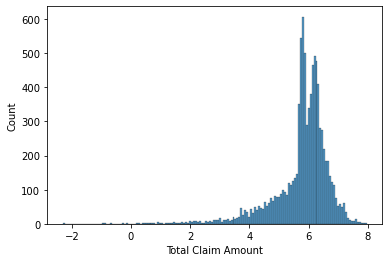

In [76]:
tca_log = np.log(data2['Total Claim Amount'])
sns.histplot(tca_log) # looks better